In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Notes
(Les idées viennent d'une tuto Youtube)

Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation

### Checklist de base

#### Objectifs :
- **immo-data** : 
    - Retrouver les différents profils de personnes qui souhaite acheter un appartement
    - Récupérer plus de données avec les filtres différents


#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 1654 lignes et dans notre méthode de scrapping, on ne prend pas en compte les valeurs manquantes
- **types de variables** :
    - Décider quels opérations réaliser sur les deux types de variables
    - qualitatifs : 
        - Adresse
        - Ville
        - Arrondissement
        - Type
    - quantitatifs : 
        - Prix (€)
        - Prix mensuel (€)
        - Pièce(s)
        - Surface (m2)
        - Date de vente
- **Analyse des valeurs manquantes** :
    - Nous n'avons pas de valeur manquante, mais nous devons les redéfinir (par exemple, on n'aurait pas besoin de ville et de prix original)
- **Notes random** :
    - On a beaucoup de outliers qui empêchent de bien visualiser les graphes (On le voit bien avec sns.pairplot). Solution : ?
    - Par exemple, je pense pas qu'on va garder les appartements à plus de 200 m² (en vrai pourquoi pas, mais y a trop peu de données dessus)
    - Ou alors avec quelques lignes de code et sklearn, détecter automatiquement les outliers et faire du pré-processing après ça.

#### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :

#### Analyse plus détaillée :
- **Relation Variables / Variables** :
- **NaN analyse** :

#### hypotheses nulle (H0) :
- Permet de voir si des analyses contiennent des changements significatifs

In [ ]:
# Idées immo-data

In [ ]:
# Idées century21

In [ ]:
# Idées housedata

## Immo-data

In [3]:
file_path = 'data/immodataParis.csv'
data = pd.read_csv(file_path)

### Analyse de Forme :

#### Visualisation

In [5]:
df = data.copy()
df.shape
df.dtypes.value_counts() # Différentes types de données des colonnes

int64     5
object    4
dtype: int64

In [7]:
df.head()

,Adresse,Ville,Arrondissement,Type,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2),Date de vente
0,270 RUE SAINT-HONORÉ,PARIS,75001,Appartement,750400,14431,2,52,22/05/2023
1,186 RUE DE RIVOLI,PARIS,75001,Appartement,330000,14348,1,23,28/04/2023
2,23 RUE DE RICHELIEU,PARIS,75001,Appartement,360100,15657,1,23,29/03/2023
3,27 RUE DE RICHELIEU,PARIS,75001,Appartement,286123,11005,1,26,10/02/2023
4,272 RUE SAINT-HONORÉ,PARIS,75001,Appartement,411636,12864,2,32,28/12/2022


In [8]:
df.columns

Index(['Adresse', 'Ville', 'Arrondissement', 'Type', 'Prix (€)',
       'Prix mensuel (€)', 'Pièce(s)', 'Surface (m2)', 'Date de vente'],
      dtype='object')

- **Adresse** : Valeur non unique (mais pas besoin pour les analyses)
- **Ville** : Même valeur (à retirer)
- **Arrondissement** : A regouper ?
- **Type** : A regrouper (beaucoup plus d'appartements que le reste... -> Récupérer plus de données pour les autres types)
- **Prix (€)** : A retirer ?
- **Prix mensuel (€)** : Pour la prédiction
- **Pièce(s)** : Sort
- **Surface (m2)** : Sort
- **Date de vente** : Il faut qu'on créer des analyses avec les dates (c'est possible)

#### Statistiques et Filtres

In [25]:
# Counting

df['Ville'].value_counts()

PARIS    1654
Name: Ville, dtype: int64

In [9]:
# Sorting

df.sort_values('Surface (m2)')

,Adresse,Ville,Arrondissement,Type,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2),Date de vente
762,142 RUE DU FAUBOURG SAINT-DENIS,PARIS,75010,Appartement,20000,6667,1,3,27/01/2022
687,46 RUE LAMARTINE,PARIS,75009,Appartement,19000,3800,1,5,01/04/2021
664,17 RUE DE CHÂTEAUDUN,PARIS,75009,Appartement,40000,8000,1,5,27/10/2021
552,2 RUE MALEVILLE,PARIS,75008,Appartement,60000,10000,1,6,23/05/2023
206,3 RUE PAUL DUBOIS,PARIS,75003,Appartement,105000,17500,1,6,06/11/2018
...,...,...,...,...,...,...,...,...,...
1232,77 AVENUE HENRI MARTIN,PARIS,75016,Appartement,2090000,6147,7,340,14/01/2023
1210,77 AVENUE HENRI MARTIN,PARIS,75016,Appartement,5271700,15505,7,340,26/06/2023
1283,87 AVENUE HENRI MARTIN,PARIS,75016,Appartement,5228950,13072,9,400,17/11/2021
362,151B RUE SAINT-JACQUES,PARIS,75005,Maison,19346000,43377,13,446,15/03/2021


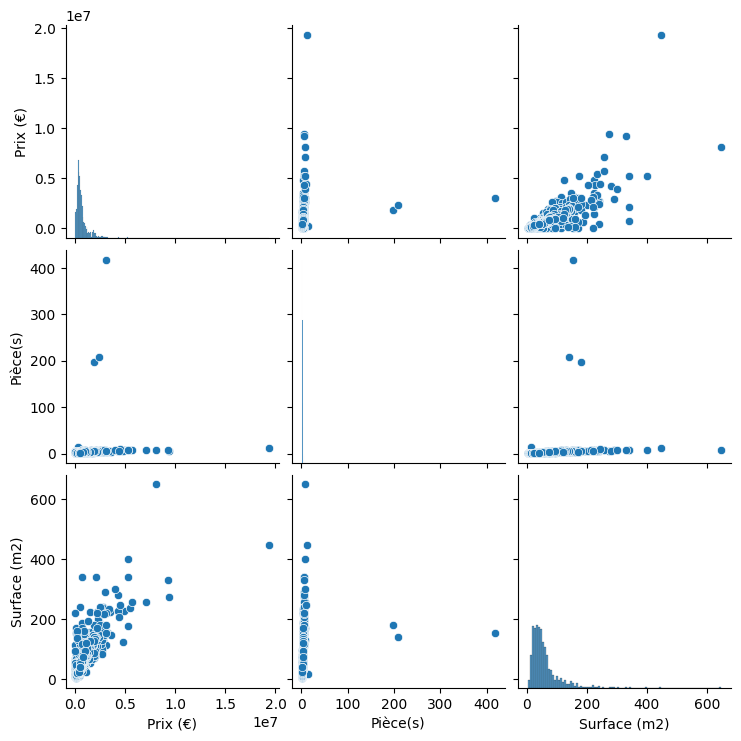

In [17]:
# Pour une meilleure visualisation, peut-être mettre de la couleur
# en fonction des labels correspondant à des clusters différents

sns.pairplot(df[['Prix (€)', 'Pièce(s)', 'Surface (m2)']])

In [30]:
# Clustering 
# Transformation Données > Normalisation > Clustering 
# (ce serait mieux que de directement faire du Clustering, le faire
# dans la partie Modelling)
# Dans la partie 'Modelling', il faudra ajuster le nombre de clusters
# Peut-être en utilisant GridSeachCV

from sklearn.cluster import AgglomerativeClustering

new_df = df[["Prix (€)","Pièce(s)","Surface (m2)"]]
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster_labels = clustering.fit_predict(new_df)
new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns

C:\Users\sunse\AppData\Local\Temp\ipykernel_59776\1648186426.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels


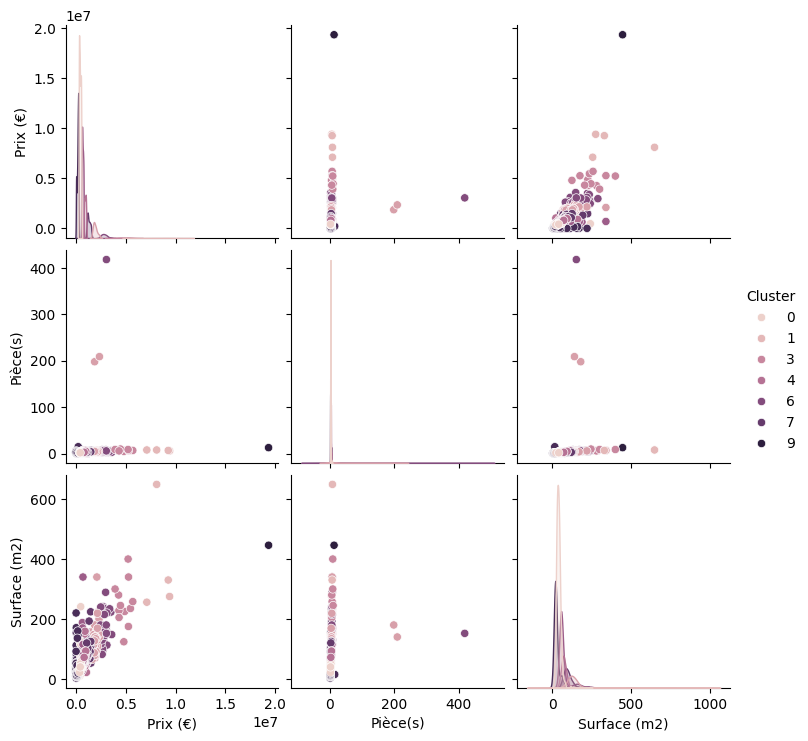

In [31]:
sns.pairplot(new_df, hue='Cluster')

#### Analyse de Fond :

#### Analyse plus détaillée :

#### hypotheses nulle (H0) :